In [1]:
import sys
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from nilearn import image
from nilearn.glm.first_level import FirstLevelModel
from nilearn.plotting import plot_design_matrix
from nilearn.interfaces.fmriprep import load_confounds
from nilearn import plotting
sys.path.append('..')
from utils.data import Subject, load_participant_list

In [2]:
base_dir = '/Users/hugofluhr/data/LH_dev'
bids_dir = "/Users/hugofluhr/data/LH_dev/fmriprep-23.2.1"

all_sub_ids = load_participant_list(base_dir)

sub_ids = all_sub_ids

In [3]:
subjects = [Subject(base_dir, sub_id, include_modeling=True, include_imaging=True, bids_dir=bids_dir) for sub_id in sub_ids]

/Users/hugofluhr/phd_local/repositories/RewardPairsTask_Analysis/notebooks/../utils/data.py:166: UserWarning: Last 1 trial(s) of block had no response, filling with 0
/Users/hugofluhr/phd_local/repositories/RewardPairsTask_Analysis/notebooks/../utils/data.py:166: UserWarning: Last 1 trial(s) of block had no response, filling with 0


In [10]:
# get the reference images to know the shape of the data
N_learning = image.load_img(subjects[0].img.get('learning1')).shape[-1]
N_test = image.load_img(subjects[0].img.get('test')).shape[-1]

In [19]:
all_volumes = np.zeros((len(subjects), 3))
all_volumes[:, :2] = N_learning
all_volumes[:, 2] = N_test

In [14]:
valid_volumes = np.zeros((len(subjects), 3))

for i, sub in enumerate(subjects):
    for j, run in enumerate(sub.runs):
        img_path = sub.img.get(run)
        _, sample_mask  = load_confounds(img_path,
                                         strategy=('motion','high_pass','wm_csf',
                                                   'scrub'),
                                         scrub=0,
                                         fd_threshold=0.5,
                                         std_dvars_threshold=1.5) # type: ignore
        valid_volumes[i,j] = len(sample_mask)

In [31]:
scrubbed_volumes = (all_volumes - valid_volumes)/all_volumes

In [32]:
scrubbed_volumes.mean(axis=0)

array([0.18814379, 0.20149254, 0.19662228])

In [33]:
scrubbed_volumes.std(axis=0)

array([0.13455536, 0.15893539, 0.12948049])

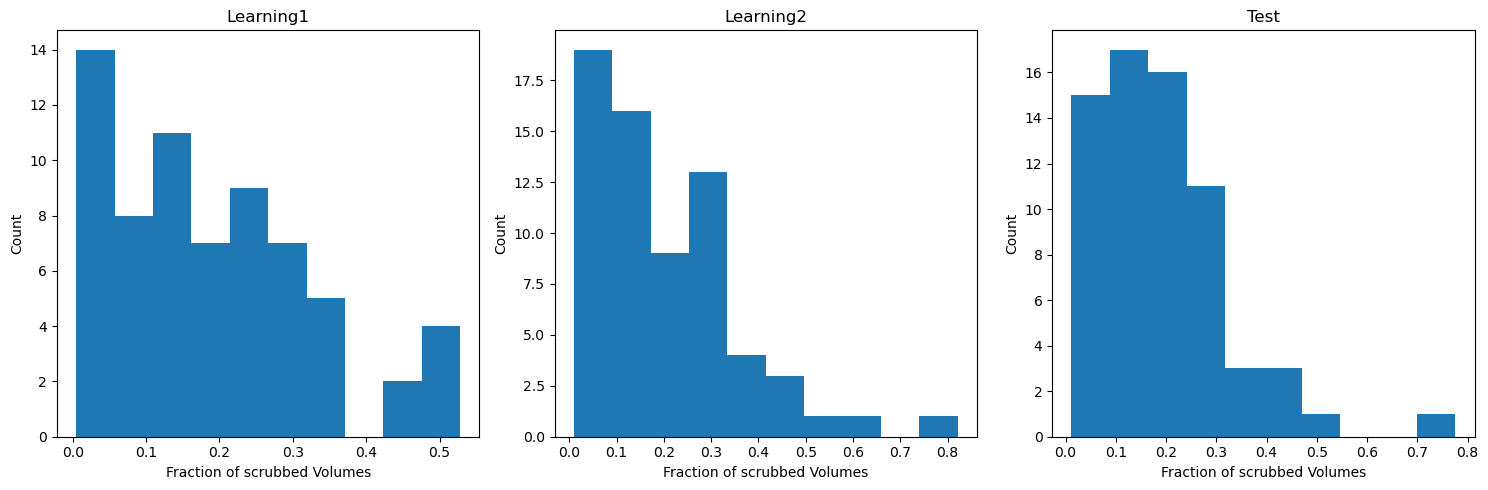

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(scrubbed_volumes[:, 0], bins=10, label='learning1')
axes[0].set_title('Learning1')
axes[0].set_xlabel('Fraction of scrubbed Volumes')
axes[0].set_ylabel('Count')

axes[1].hist(scrubbed_volumes[:, 1], bins=10, label='learning2')
axes[1].set_title('Learning2')
axes[1].set_xlabel('Fraction of scrubbed Volumes')
axes[1].set_ylabel('Count')

axes[2].hist(scrubbed_volumes[:, 2], bins=10, label='test')
axes[2].set_title('Test')
axes[2].set_xlabel('Fraction of scrubbed Volumes')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()